## Machine Learning Project - Classification

Dataset link : https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels

### Dataset Information

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

Gender: Feature, Categorical, "Gender"

Age : Feature, Continuous, "Age"

Height: Feature, Continuous

Weight: Feature Continuous

family_history_with_overweight: Feature, Binary, " Has a family member suffered or suffers from overweight? "

FAVC : Feature, Binary, " Do you eat high caloric food frequently? "

FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "

NCP : Feature, Continuous, " How many main meals do you have daily? "

CAEC : Feature, Categorical, " Do you eat any food between meals? "

SMOKE : Feature, Binary, " Do you smoke? "

CH2O: Feature, Continuous, " How much water do you drink daily? "

SCC: Feature, Binary, " Do you monitor the calories you eat daily? "

FAF: Feature, Continuous, " How often do you have physical activity? "

TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

CALC : Feature, Categorical, " How often do you drink alcohol? " MTRANS : Feature, Categorical, " Which transportation do you usually use? "

Class labels that wll be predicted NObeyesdad : Target, Categorical, "Obesity level"

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

Reading the dataset

In [2]:
df = pd.read_csv('Obesity_dataset.csv')
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
# First, check for any missing values in the dataset
missing_values = df.isnull().sum()
missing_values

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

This line checks for any missing (null) values in each column of the DataFrame data. It sums up the number of null entries for each column, providing a count of how many missing values are present in each column.
As we can see from the reuslts there are no missing values.

In [4]:
sns.set(style="whitegrid")

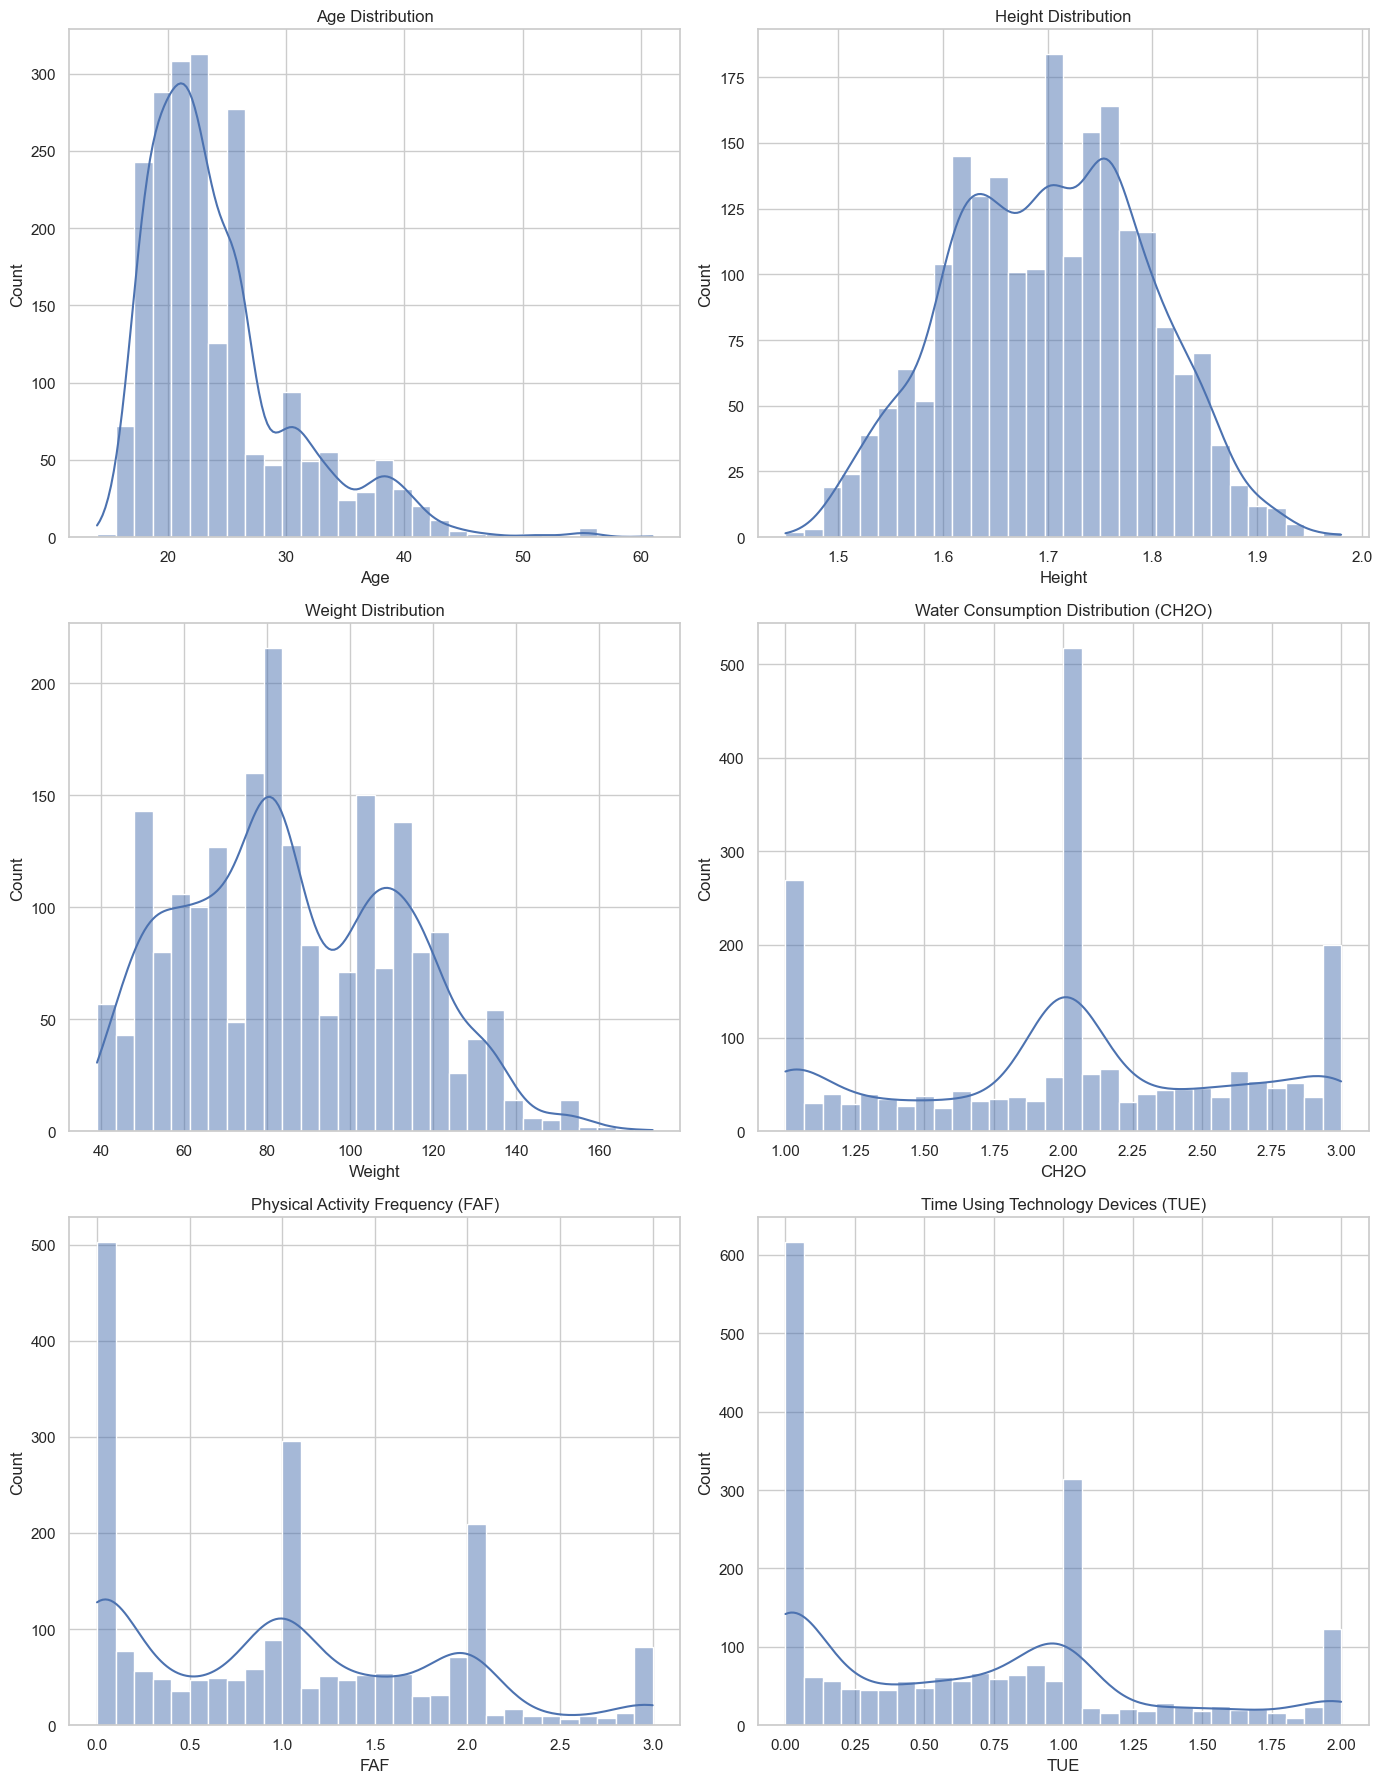

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0, 0]).set_title('Age Distribution')
sns.histplot(df['Height'], bins=30, kde=True, ax=axes[0, 1]).set_title('Height Distribution')
sns.histplot(df['Weight'], bins=30, kde=True, ax=axes[1, 0]).set_title('Weight Distribution')
sns.histplot(df['CH2O'], bins=30, kde=True, ax=axes[1, 1]).set_title('Water Consumption Distribution (CH2O)')
sns.histplot(df['FAF'], bins=30, kde=True, ax=axes[2, 0]).set_title('Physical Activity Frequency (FAF)')
sns.histplot(df['TUE'], bins=30, kde=True, ax=axes[2, 1]).set_title('Time Using Technology Devices (TUE)')
plt.tight_layout()

plt.show()

Showing numerical features distribution: 

Age: The distribution of age shows a skew towards younger individuals, with a peak around the early 20s.

Height: Height distribution appears to be roughly normal with a slight skew, centered around 1.7 meters.

Weight: Weight distribution is positively skewed, indicating a variety of body weights skewed towards heavier weights.

Water Consumption (CH2O): Water consumption is somewhat uniformly distributed across the three main levels.

Physical Activity Frequency (FAF): This feature shows a wide distribution, suggesting varied levels of physical activity among individuals.

Time Using Technology Devices (TUE): This feature also exhibits a broad spread, indicating differing habits in technology usage among the population.

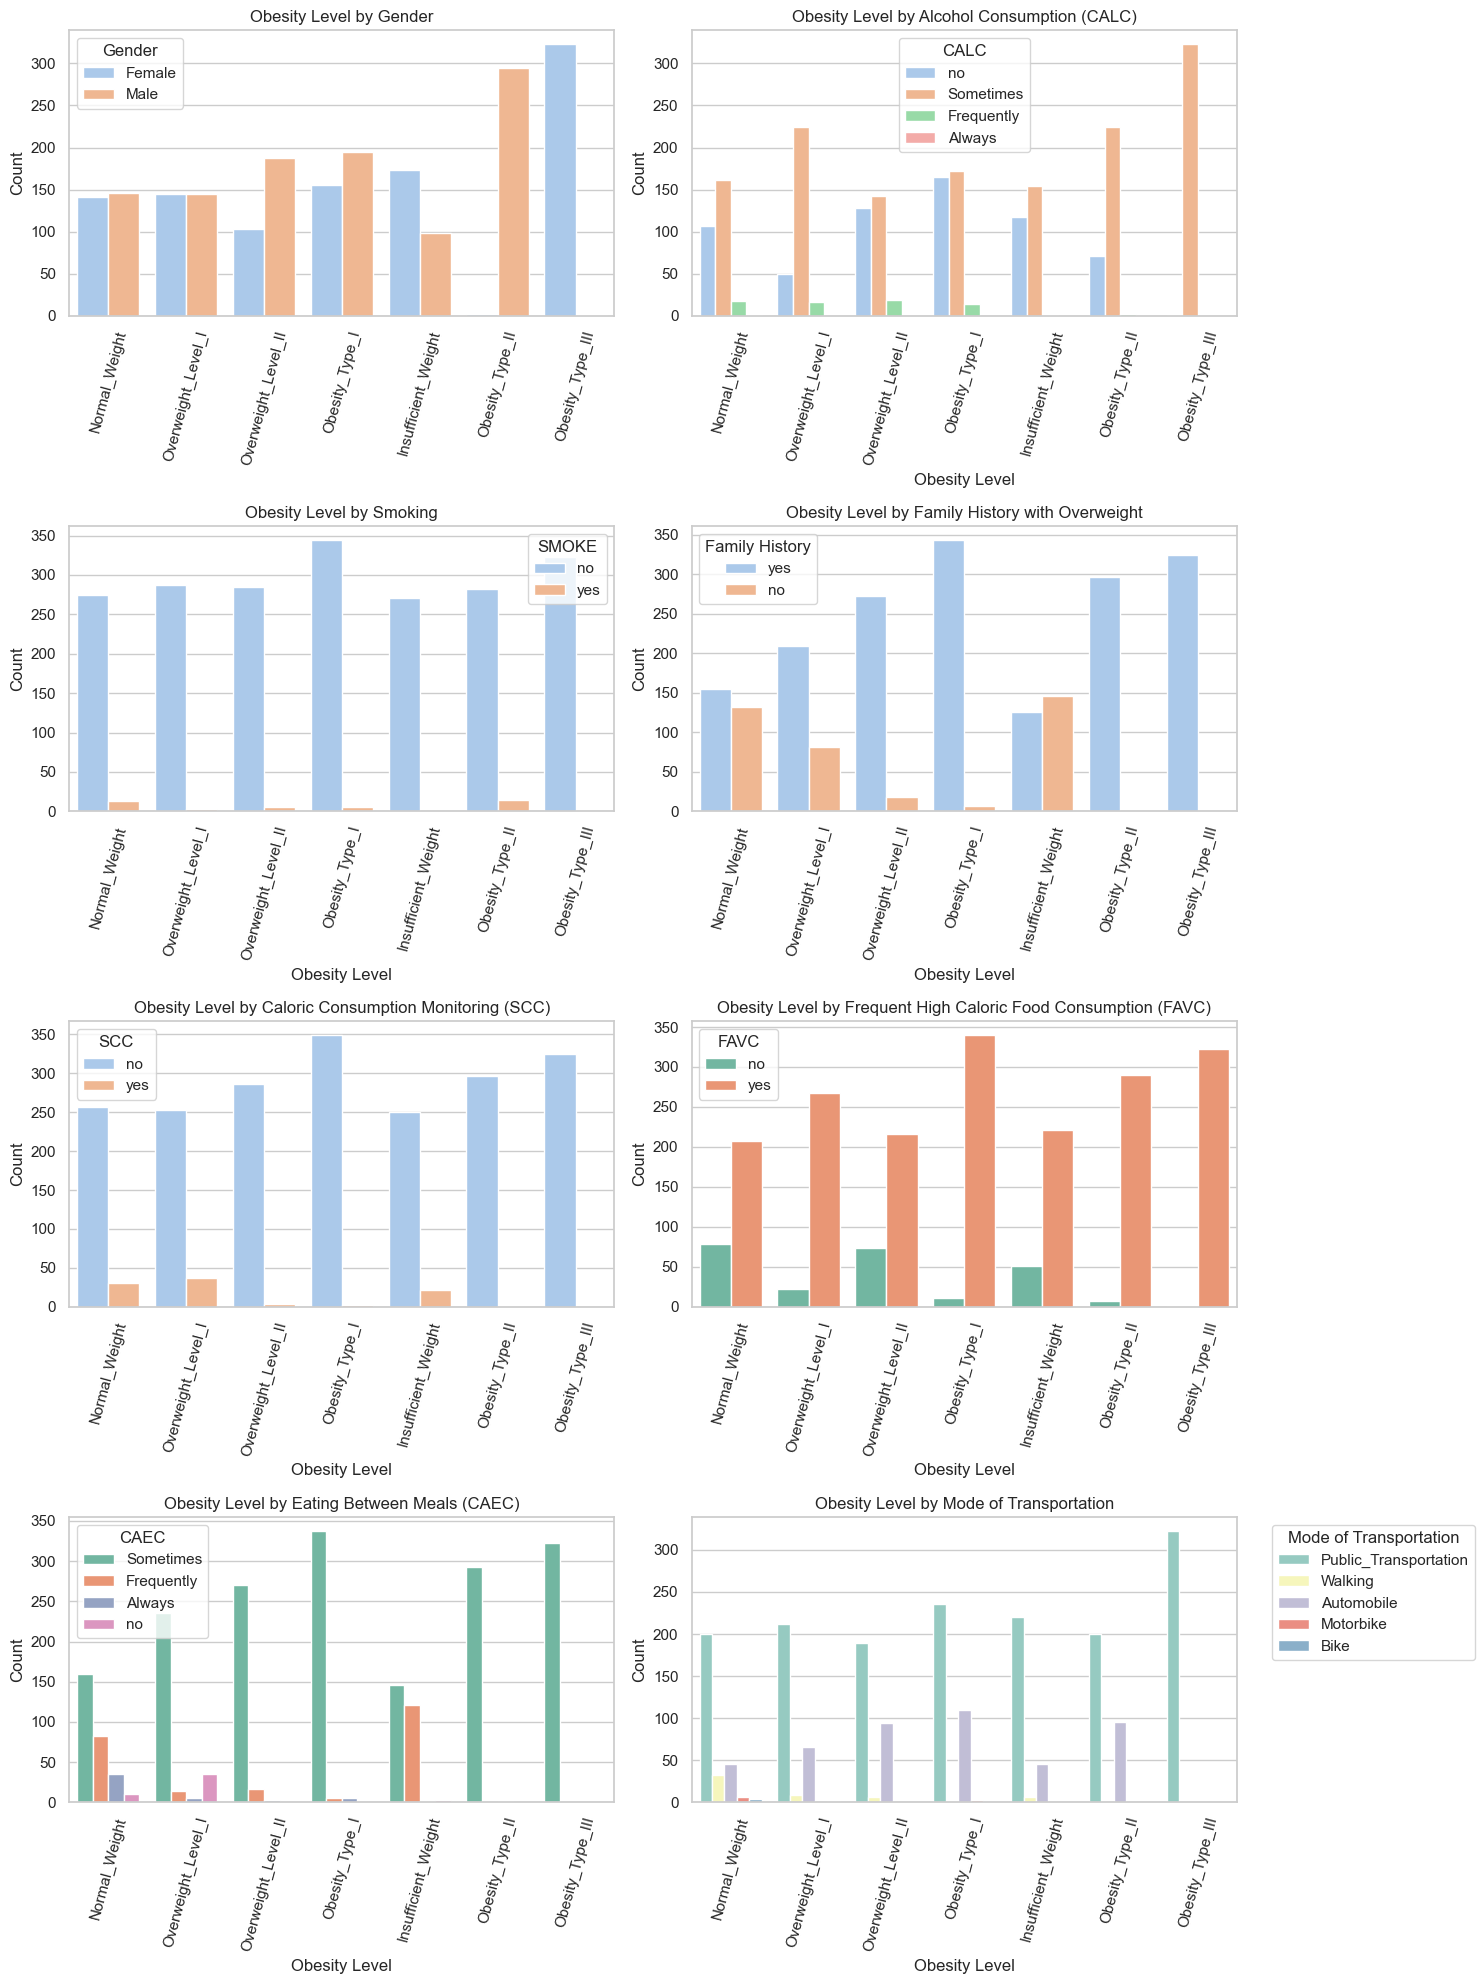

In [6]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # Adjusting to 4 rows and 2 columns

# Plotting grouped bar charts for different variables against obesity level
sns.countplot(x='NObeyesdad', hue='Gender', data=df, ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('Obesity Level by Gender')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Gender')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=75) 

sns.countplot(x='NObeyesdad', hue='CALC', data=df, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Obesity Level by Alcohol Consumption (CALC)')
axes[0, 1].set_xlabel('Obesity Level')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='CALC')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=75) 

sns.countplot(x='NObeyesdad', hue='SMOKE', data=df, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Obesity Level by Smoking')
axes[1, 0].set_xlabel('Obesity Level')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='SMOKE')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=75) 

sns.countplot(x='NObeyesdad', hue='family_history_with_overweight', data=df, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Obesity Level by Family History with Overweight')
axes[1, 1].set_xlabel('Obesity Level')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Family History')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=75) 


sns.countplot(x='NObeyesdad', hue='SCC', data=df, ax=axes[2, 0], palette='pastel')
axes[2, 0].set_title('Obesity Level by Caloric Consumption Monitoring (SCC)')
axes[2, 0].set_xlabel('Obesity Level')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='SCC')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=75) 


sns.countplot(x='NObeyesdad', hue='FAVC', data=df, ax=axes[2, 1], palette='Set2')
axes[2, 1].set_title('Obesity Level by Frequent High Caloric Food Consumption (FAVC)')
axes[2, 1].set_xlabel('Obesity Level')
axes[2, 1].set_ylabel('Count')
axes[2, 1].legend(title='FAVC')
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=75) 


sns.countplot(x='NObeyesdad', hue='CAEC', data=df, ax=axes[3, 0], palette='Set2')
axes[3, 0].set_title('Obesity Level by Eating Between Meals (CAEC)')
axes[3, 0].set_xlabel('Obesity Level')
axes[3, 0].set_ylabel('Count')
axes[3, 0].legend(title='CAEC')
axes[3, 0].set_xticklabels(axes[3, 0].get_xticklabels(), rotation=75) 

sns.countplot(x='NObeyesdad', hue='MTRANS', data=df, ax=axes[3, 1], palette='Set3')
axes[3, 1].set_title('Obesity Level by Mode of Transportation')
axes[3, 1].set_xlabel('Obesity Level')
axes[3, 1].set_ylabel('Count')
axes[3, 1].legend(title='Mode of Transportation', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[3, 1].set_xticklabels(axes[3, 1].get_xticklabels(), rotation=75) 

plt.tight_layout()
plt.show()


In [7]:
# Encoding categorical variables
categorical_cols = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

target_encoder = LabelEncoder()
df['NObeyesdad'] = target_encoder.fit_transform(df['NObeyesdad'])

In [8]:
not_scaled_df=df

In [9]:
# Scale the features
scaler = StandardScaler()
feature_columns = [col for col in df.columns if col != 'NObeyesdad']
df[feature_columns] = scaler.fit_transform(df[feature_columns])
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,-0.522124,-1.011914,-0.875589,-0.862558,1.419172,-2.759769,-0.785019,0.404153,-0.218272,-0.145900,-0.013073,0.472291,-1.188039,0.561997,0.300346,0.503337,1
1,-0.522124,-1.011914,-1.947599,-1.168077,-0.521160,-2.759769,1.088342,0.404153,4.581439,6.853997,1.618759,0.472291,2.339750,-1.080625,0.300346,0.503337,1
2,-0.206889,0.988227,1.054029,-0.366090,-2.461491,-2.759769,-0.785019,0.404153,-0.218272,-0.145900,-0.013073,0.472291,1.163820,0.561997,0.300346,0.503337,1
3,0.423582,0.988227,1.054029,0.015808,-2.461491,-2.759769,1.088342,0.404153,-0.218272,-0.145900,-0.013073,-2.117337,1.163820,-1.080625,0.300346,1.296280,5
4,-0.364507,0.988227,0.839627,0.122740,-0.521160,-2.759769,-0.785019,-2.167023,-0.218272,-0.145900,-0.013073,-2.117337,-1.188039,-1.080625,0.300346,0.503337,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-0.525774,-1.011914,0.097045,1.711763,-0.521160,0.362349,1.088342,0.404153,-0.218272,-0.145900,-0.456705,0.472291,0.783135,0.407996,0.300346,0.503337,4
2107,-0.367195,-1.011914,0.502844,1.800914,-0.521160,0.362349,1.088342,0.404153,-0.218272,-0.145900,-0.004702,0.472291,0.389341,-0.096251,0.300346,0.503337,4
2108,-0.281909,-1.011914,0.541672,1.798868,-0.521160,0.362349,1.088342,0.404153,-0.218272,-0.145900,0.075361,0.472291,0.474971,-0.019018,0.300346,0.503337,4
2109,0.007776,-1.011914,0.404927,1.785780,-0.521160,0.362349,1.088342,0.404153,-0.218272,-0.145900,1.377801,0.472291,0.151471,-0.117991,0.300346,0.503337,4


In [10]:
# Generate basic statistics to understand the distribution and identify potential outliers or incorrect data
df_description = df.describe()
df_description

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2111.000000,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2111.000000
mean,0.000000,-5.385449e-17,-5.385449e-16,-5.385449e-16,-5.048859e-17,1.346362e-16,-1.346362e-17,4.964711e-16,-6.731812e-17,-2.019544e-17,1.077090e-16,-8.078174e-17,2.692725e-17,-1.346362e-17,1.884907e-16,-7.404993e-17,3.015632
std,1.000237,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.952090
min,-1.625448,-1.011914e+00,-2.698006e+00,-1.817304e+00,-4.401822e+00,-2.759769e+00,-2.658379e+00,-2.167023e+00,-2.182720e-01,-1.459003e-01,-1.644905e+00,-2.117337e+00,-1.188039e+00,-1.080625e+00,-3.969213e+00,-1.875493e+00,0.000000
25%,-0.688066,-1.011914e+00,-7.683883e-01,-8.062914e-01,-5.211595e-01,3.623491e-01,-7.850187e-01,-3.456952e-02,-2.182720e-01,-1.459003e-01,-6.905894e-01,4.722913e-01,-1.041630e+00,-1.080625e+00,3.003456e-01,5.033367e-01,1.000000
50%,-0.241897,9.882266e-01,-1.263207e-02,-1.369510e-01,-5.211595e-01,3.623491e-01,-6.283450e-02,4.041527e-01,-2.182720e-01,-1.459003e-01,-1.307326e-02,4.722913e-01,-1.210937e-02,-5.341135e-02,3.003456e-01,5.033367e-01,3.000000
75%,0.265964,9.882266e-01,7.159595e-01,7.960531e-01,1.419172e+00,3.623491e-01,1.088342e+00,4.041527e-01,-2.182720e-01,-1.459003e-01,7.659959e-01,4.722913e-01,7.718565e-01,5.619968e-01,3.003456e-01,5.033367e-01,5.000000
max,5.782584,9.882266e-01,2.983646e+00,3.300136e+00,1.419172e+00,3.623491e-01,1.088342e+00,1.689740e+00,4.581439e+00,6.853997e+00,1.618759e+00,4.722913e-01,2.339750e+00,2.204618e+00,2.435125e+00,1.296280e+00,6.000000


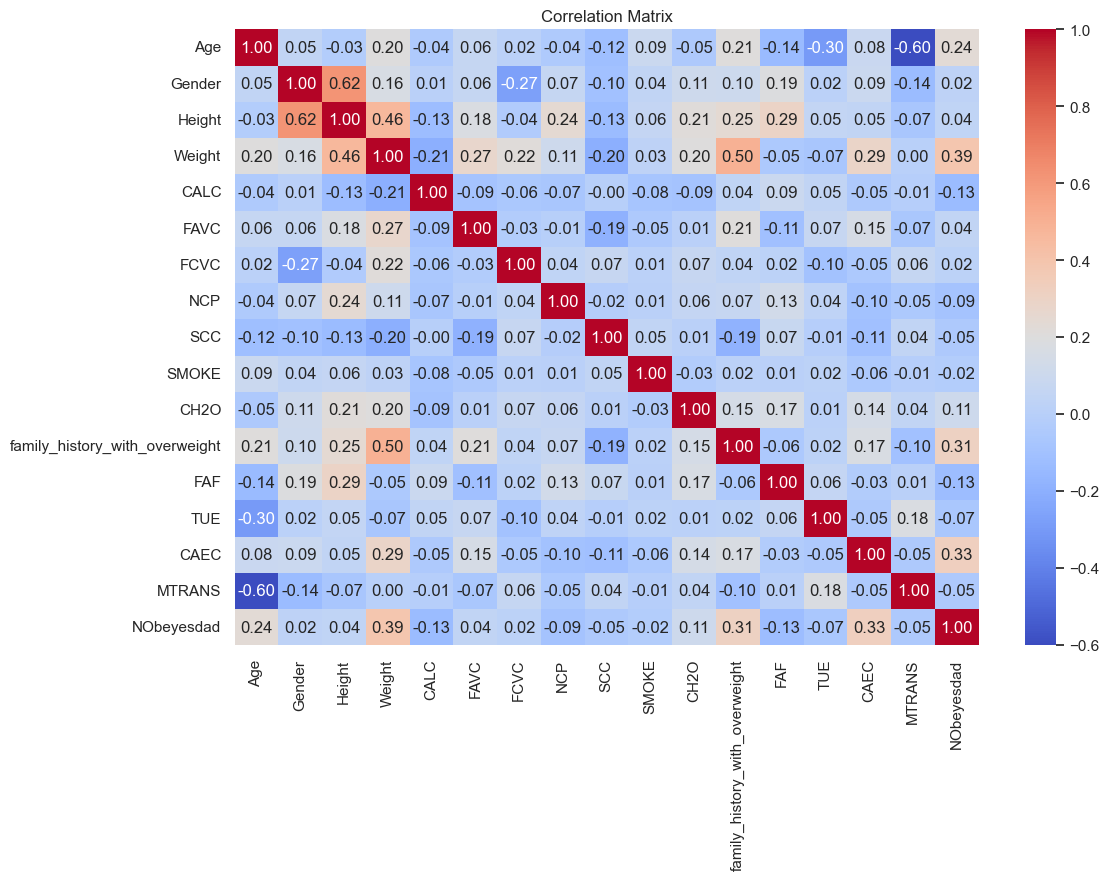

In [11]:
# Generating a heatmap to analyze correlations between features
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

plt.show()

Correlation Matrix:

There are varying degrees of correlation among the features. Notable correlations include:
A positive correlation between weight and the obesity level (NObeyesdad), suggesting that higher weight correlates with higher obesity categories.
Height and gender show a moderate correlation, which might reflect typical physiological differences between males and females in the population.
Negative correlation between physical activity frequency (FAF) and obesity level, implying that higher physical activity is associated with lower obesity levels.
There are correlations between lifestyle habits (like water consumption, smoking, and caloric food consumption) and obesity levels, though these are less pronounced.

## Algorithm Application

In [12]:
# Split the data into training and testing sets
X = df.drop('NObeyesdad', axis=1).values
y = df['NObeyesdad'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### KNN Classifier Custom and Built-in

In [13]:
from collections import Counter
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNNClassifier:
    def __init__(self, k=1):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


In [14]:
our_knn = KNNClassifier(k=3)  # You can experiment with different values of k

our_knn.fit(X_train, y_train)

our_knn_pred = our_knn.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
our_knn_accuracy=accuracy_score(y_test, our_knn_pred)
our_knn_precision=precision_score(y_test, our_knn_pred, average='weighted')
our_knn_recall=recall_score(y_test, our_knn_pred, average='weighted')
our_knn_f1Score=f1_score(y_test, our_knn_pred, average='weighted')
print(f"KNN Accuracy: {our_knn_accuracy:.4f}")
print(f"KNN Precision: {our_knn_precision:.4f}")
print(f"KNN Recall: {our_knn_recall:.4f}")
print(f"KNN F1 Score: {our_knn_f1Score:.4f}")


KNN Accuracy: 0.8345
KNN Precision: 0.8377
KNN Recall: 0.8345
KNN F1 Score: 0.8292


In [16]:
print(classification_report(y_test, our_knn_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84        56
           1       0.82      0.52      0.63        62
           2       0.86      0.90      0.88        78
           3       0.95      0.97      0.96        58
           4       0.97      1.00      0.98        63
           5       0.77      0.71      0.74        56
           6       0.67      0.82      0.74        50

    accuracy                           0.83       423
   macro avg       0.83      0.83      0.82       423
weighted avg       0.84      0.83      0.83       423



In [17]:
from sklearn.neighbors import KNeighborsClassifier
# Built-in K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

In [18]:
knn_accuracy=accuracy_score(y_test, our_knn_pred)
knn_precision=precision_score(y_test, our_knn_pred, average='weighted')
knn_recall=recall_score(y_test, our_knn_pred, average='weighted')
knn_f1Score=f1_score(y_test, our_knn_pred, average='weighted')
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"KNN Precision: {knn_precision:.4f}")
print(f"KNN Recall: {knn_recall:.4f}")
print(f"KNN F1 Score: {knn_f1Score:.4f}")

KNN Accuracy: 0.8345
KNN Precision: 0.8377
KNN Recall: 0.8345
KNN F1 Score: 0.8292


In [19]:
# Evaluate built-in K-Nearest Neighbors
print("Built-in KNN Classification Report:")
print(classification_report(y_test, knn_predictions))

Built-in KNN Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        56
           1       0.75      0.48      0.59        62
           2       0.88      0.90      0.89        78
           3       0.95      0.97      0.96        58
           4       0.98      1.00      0.99        63
           5       0.78      0.70      0.74        56
           6       0.69      0.80      0.74        50

    accuracy                           0.83       423
   macro avg       0.82      0.82      0.81       423
weighted avg       0.83      0.83      0.82       423



## Naive Bayes Classification Custom and Built-in

In [20]:
class NaiveBayes:
    def __init__(self):
        self.class_prior_probabilities = {}
        self.feature_probabilities = {}

    def calculate_prior_probabilities(self, y):
        class_counts = np.unique(y, return_counts=True)
        total_count = len(y)
        self.class_prior_probabilities = {class_label: count / total_count for class_label, count in zip(class_counts[0], class_counts[1])}
        
    def fit(self, X, y):
        pass  

    def predict(self, X):
        pass  

In [21]:
class GaussianNaiveBayes(NaiveBayes):
    def fit(self, X, y):
        self.calculate_prior_probabilities(y)
        self.feature_probabilities = {c: [] for c in self.class_prior_probabilities.keys()}

        for c in self.class_prior_probabilities.keys():
            X_c = X[y == c]
            self.feature_probabilities[c] = [(np.mean(feature), np.var(feature)) for feature in zip(*X_c)]

    def predict(self, X):
        predictions = []
        for x in X:
            class_probabilities = {}
            for c, class_prior in self.class_prior_probabilities.items():
                class_probabilities[c] = np.log(class_prior)
                for i, (mean, var) in enumerate(self.feature_probabilities[c]):
                    class_probabilities[c] += (-np.log(2 * np.pi * var) / 2) - ((x[i] - mean) ** 2 / (2 * var))
            predictions.append(max(class_probabilities, key=class_probabilities.get))
        return predictions


In [22]:
our_gnb = GaussianNaiveBayes()

our_gnb.fit(X_train, y_train)

our_gnb_pred = our_gnb.predict(X_test)

In [23]:
our_gnb_accuracy=accuracy_score(y_test, our_gnb_pred )
our_gnb_precision=precision_score(y_test, our_gnb_pred , average='weighted')
our_gnb_recall=recall_score(y_test, our_gnb_pred , average='weighted')
our_gnb_f1Score=f1_score(y_test, our_gnb_pred , average='weighted')
print(f"Our GNB Accuracy: {our_gnb_accuracy:.4f}")
print(f"Our GNB Precision: {our_gnb_precision:.4f}")
print(f"Our GNB Recall: {our_gnb_recall:.4f}")
print(f"Our GNB F1 Score: {our_gnb_f1Score:.4f}")

Our GNB Accuracy: 0.6407
Our GNB Precision: 0.6389
Our GNB Recall: 0.6407
Our GNB F1 Score: 0.6174


In [24]:
print(classification_report(y_test, our_gnb_pred))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80        56
           1       0.68      0.34      0.45        62
           2       0.45      0.64      0.53        78
           3       0.69      0.91      0.79        58
           4       0.91      1.00      0.95        63
           5       0.49      0.30      0.37        56
           6       0.57      0.32      0.41        50

    accuracy                           0.64       423
   macro avg       0.64      0.63      0.61       423
weighted avg       0.64      0.64      0.62       423



In [25]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

In [26]:
gnb_accuracy=accuracy_score(y_test, gnb_predictions)
gnb_precision=precision_score(y_test, gnb_predictions, average='weighted')
gnb_recall=recall_score(y_test, gnb_predictions, average='weighted')
gnb_f1Score=f1_score(y_test, gnb_predictions , average='weighted')
print(f"GNB Accuracy: {gnb_accuracy:.4f}")
print(f"GNB Precision: {gnb_precision:.4f}")
print(f"GNB Recall: {gnb_recall:.4f}")
print(f"GNB F1 Score: {gnb_f1Score:.4f}")

GNB Accuracy: 0.6407
GNB Precision: 0.6450
GNB Recall: 0.6407
GNB F1 Score: 0.6196


In [27]:
print(classification_report(y_test, gnb_predictions))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79        56
           1       0.68      0.34      0.45        62
           2       0.44      0.64      0.52        78
           3       0.66      0.91      0.77        58
           4       1.00      1.00      1.00        63
           5       0.49      0.30      0.37        56
           6       0.57      0.32      0.41        50

    accuracy                           0.64       423
   macro avg       0.65      0.63      0.62       423
weighted avg       0.64      0.64      0.62       423



## Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [29]:
lr_accuracy=accuracy_score(y_test, lr_predictions)
lr_precision=precision_score(y_test, lr_predictions, average='weighted')
lr_recall=recall_score(y_test, lr_predictions, average='weighted')
lr_f1Score=f1_score(y_test, lr_predictions, average='weighted')
print(f"LR Accuracy: {lr_accuracy:.4f}")
print(f"LR Precision: {lr_precision:.4f}")
print(f"LR Recall: {lr_recall:.4f}")
print(f"LR F1 Score: {lr_f1Score:.4f}")

LR Accuracy: 0.8747
LR Precision: 0.8790
LR Recall: 0.8747
LR F1 Score: 0.8717


In [30]:
print("Built-in Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

Built-in Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        56
           1       0.91      0.63      0.74        62
           2       0.93      0.90      0.92        78
           3       0.89      0.97      0.93        58
           4       1.00      1.00      1.00        63
           5       0.77      0.79      0.78        56
           6       0.76      0.84      0.80        50

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.88      0.87      0.87       423



## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators is the number of trees
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [32]:
rf_accuracy=accuracy_score(y_test, rf_predictions)
rf_precision=precision_score(y_test, rf_predictions, average='weighted')
rf_recall=recall_score(y_test, rf_predictions, average='weighted')
rf_f1Score=f1_score(y_test, rf_predictions, average='weighted')
print(f"RF Accuracy: {rf_accuracy:.4f}")
print(f"RF Precision: {rf_precision:.4f}")
print(f"RF Recall: {rf_recall:.4f}")
print(f"RF F1 Score: {rf_f1Score:.4f}")

RF Accuracy: 0.9504
RF Precision: 0.9516
RF Recall: 0.9504
RF F1 Score: 0.9507


In [33]:
print("RandomForest Classification Report:")
print(classification_report(y_test, rf_predictions))

RandomForest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.87      0.94      0.90        62
           2       0.99      0.95      0.97        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.87      0.86      0.86        56
           6       0.96      0.96      0.96        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



## XG Boost

In [34]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.1,max_depth=6, n_estimators=100, seed=42)
xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_test)

In [35]:
xgb_accuracy=accuracy_score(y_test, xgb_predictions)
xgb_precision=precision_score(y_test, xgb_predictions, average='weighted')
xgb_recall=recall_score(y_test, xgb_predictions, average='weighted')
xgb_f1Score=f1_score(y_test, xgb_predictions, average='weighted')
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"XGBoost Precision: {xgb_precision:.4f}")
print(f"XGBoost: {xgb_recall:.4f}")
print(f"XGBoost: {xgb_f1Score:.4f}")

XGBoost Accuracy: 0.9551
XGBoost Precision: 0.9564
XGBoost: 0.9551
XGBoost: 0.9550


In [36]:
print("XGBoost Classification Report:")
print(classification_report(y_test,xgb_predictions))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       0.95      0.85      0.90        62
           2       0.97      0.96      0.97        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.87      0.95      0.91        56
           6       1.00      0.96      0.98        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.95       423
weighted avg       0.96      0.96      0.95       423



##  Model Selection

In [37]:
results= pd.DataFrame({
    'K-Nearest Neighbors': {'Accuracy': knn_accuracy, 'Precision': knn_precision, 'Recall': knn_recall, 'F1 Score': knn_f1Score},
    'Gaussian Naive Bayes': {'Accuracy': gnb_accuracy, 'Precision': gnb_precision, 'Recall': gnb_recall, 'F1 Score': gnb_f1Score},
    'Logistic Regression': {'Accuracy': lr_accuracy, 'Precision': lr_precision, 'Recall': lr_recall, 'F1 Score': lr_f1Score},
    'Random Forest': {'Accuracy': rf_accuracy, 'Precision': rf_precision, 'Recall': rf_recall, 'F1 Score': rf_f1Score},
    'Gradient Boosting': {'Accuracy': xgb_accuracy, 'Precision': xgb_precision, 'Recall': xgb_recall, 'F1 Score': xgb_f1Score}
})
results_df = results.transpose()

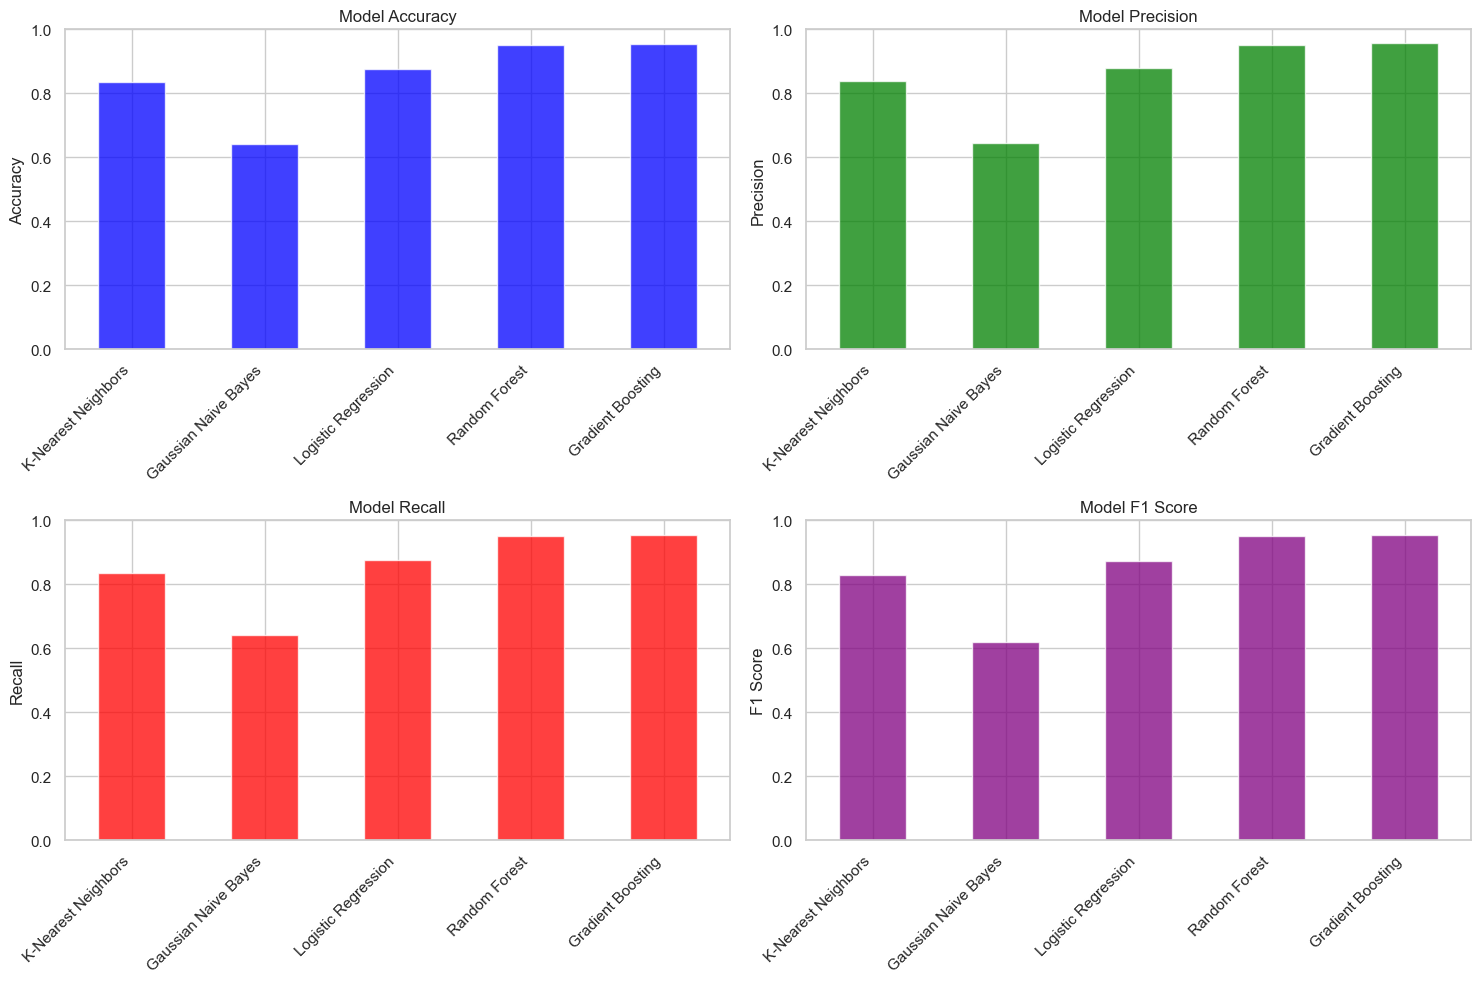

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Setup subplots
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['blue', 'green', 'red', 'purple']
titles = ['Model Accuracy', 'Model Precision', 'Model Recall', 'Model F1 Score']

for ax, metric, color, title in zip(axs.ravel(), metrics, colors, titles):
    results_df[metric].plot(kind='bar', ax=ax, color=color, alpha=0.75)
    ax.set_title(title)
    ax.set_ylabel(metric)
    ax.set_ylim(0, 1) 
    ax.set_xticklabels(results_df.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

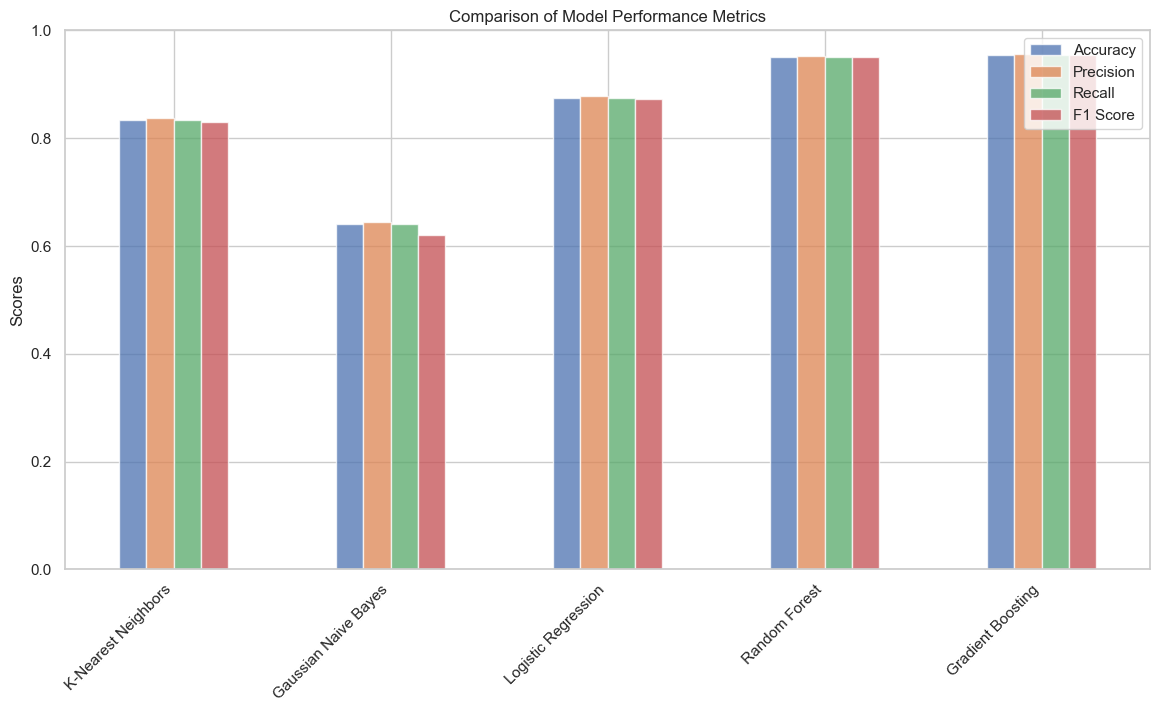

In [39]:
ax = results_df.plot(kind='bar', alpha=0.75, figsize=(14, 7))
ax.set_title('Comparison of Model Performance Metrics')
ax.set_ylabel('Scores')
ax.set_ylim(0, 1)  
ax.set_xticklabels(results_df.index, rotation=45, ha='right')
plt.show()


Finding the best model based on each of the metrics, and summarize the results:

In [40]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
best_models = {}

for metric in metrics:
    best_model = max(results, key=lambda key: results[key][metric])
    best_models[metric] = best_model

    # Print the best model for each metric
    print(f"Best model based on {metric}: {best_model}")
    print(f"   {metric}: {results[best_model][metric]}")
    print(f"   Detailed performance metrics(Printig every metrics):")
    for m in metrics:
        print(f"   {m}: {results[best_model][m]}")
    print("\n")

Best model based on Accuracy: Gradient Boosting
   Accuracy: 0.9550827423167849
   Detailed performance metrics(Printig every metrics):
   Accuracy: 0.9550827423167849
   Precision: 0.9564420845725344
   Recall: 0.9550827423167849
   F1 Score: 0.9549938210661892


Best model based on Precision: Gradient Boosting
   Precision: 0.9564420845725344
   Detailed performance metrics(Printig every metrics):
   Accuracy: 0.9550827423167849
   Precision: 0.9564420845725344
   Recall: 0.9550827423167849
   F1 Score: 0.9549938210661892


Best model based on Recall: Gradient Boosting
   Recall: 0.9550827423167849
   Detailed performance metrics(Printig every metrics):
   Accuracy: 0.9550827423167849
   Precision: 0.9564420845725344
   Recall: 0.9550827423167849
   F1 Score: 0.9549938210661892


Best model based on F1 Score: Gradient Boosting
   F1 Score: 0.9549938210661892
   Detailed performance metrics(Printig every metrics):
   Accuracy: 0.9550827423167849
   Precision: 0.9564420845725344
   Rec

So according to all the metrics the best model is Gradient Boosting

## Hyperparameter Tuning

We have really good models, but we will try to improve more our models performance by tuning. Here I will start from splitting not scaled data into train and test. Not all algorithms are required scaled data.

### Tuning for KNN

In [41]:
# Split the not scaled data into training and testing sets
X = not_scaled_df.drop('NObeyesdad', axis=1).values
y = not_scaled_df['NObeyesdad'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())  # Note the custom step name 'knn' here
])

param_grid = {
    'pca__n_components': [2, 5, 10],
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']  # Corrected to 'knn__metric'
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
best_knn = grid_search.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'knn__metric': 'euclidean', 'knn__n_neighbors': 3, 'knn__weights': 'distance', 'pca__n_components': 10}


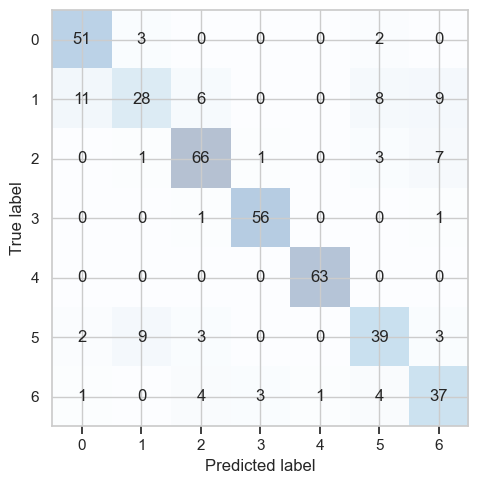

In [43]:
best_knn.fit(X_train, y_train)
tun_knn_preds = best_knn.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=tun_knn_preds)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [44]:
print(classification_report(y_test, tun_knn_preds))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        56
           1       0.68      0.45      0.54        62
           2       0.82      0.85      0.84        78
           3       0.93      0.97      0.95        58
           4       0.98      1.00      0.99        63
           5       0.70      0.70      0.70        56
           6       0.65      0.74      0.69        50

    accuracy                           0.80       423
   macro avg       0.79      0.80      0.79       423
weighted avg       0.80      0.80      0.80       423



In [45]:
tun_knn_accuracy = accuracy_score(y_true=y_test, y_pred=tun_knn_preds)
print(f'Accuracy: {tun_knn_accuracy:.3f}')

tun_knn_precision = precision_score(y_true=y_test, y_pred=tun_knn_preds, average='weighted')
print(f'Precision: {tun_knn_precision:.3f}')

tun_knn_recall = recall_score(y_true=y_test, y_pred=tun_knn_preds, average='weighted')
print(f'Recall: {tun_knn_recall:.3f}')

tun_knn_f1score = f1_score(y_true=y_test, y_pred=tun_knn_preds, average='weighted')
print(f'F1: {tun_knn_f1score:.3f}')

Accuracy: 0.804
Precision: 0.800
Recall: 0.804
F1: 0.797


### Tuning for Naive Bayes 

In [46]:
# No scaling necessary for GaussianNB, but we include it in a simple pipeline for consistency
pipeline_nb = Pipeline([
    ('nb', GaussianNB())
])

param_grid_nb = {
    'nb__var_smoothing': np.logspace(0, -9, num=100)
}

grid_search_nb = GridSearchCV(pipeline_nb, param_grid_nb, cv=5, scoring='accuracy', verbose=1)
grid_search_nb.fit(X_train, y_train)


print("Best parameters found for Gaussian Naive Bayes:", grid_search_nb.best_params_)
best_nb = grid_search_nb.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for Gaussian Naive Bayes: {'nb__var_smoothing': 0.005336699231206307}


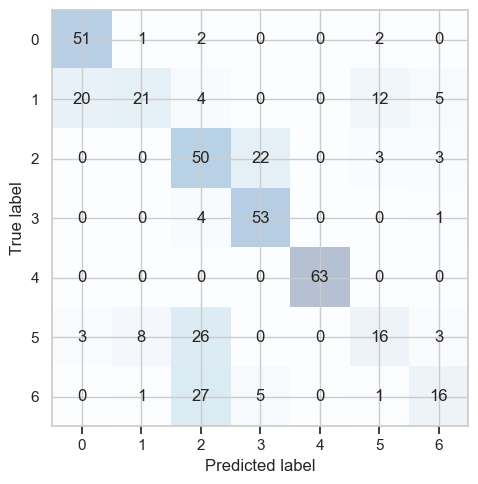

In [47]:
best_nb.fit(X_train, y_train)
tun_nb_preds = best_nb.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=tun_nb_preds)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [48]:
print(classification_report(y_test, tun_nb_preds))

              precision    recall  f1-score   support

           0       0.69      0.91      0.78        56
           1       0.68      0.34      0.45        62
           2       0.44      0.64      0.52        78
           3       0.66      0.91      0.77        58
           4       1.00      1.00      1.00        63
           5       0.47      0.29      0.36        56
           6       0.57      0.32      0.41        50

    accuracy                           0.64       423
   macro avg       0.64      0.63      0.61       423
weighted avg       0.64      0.64      0.62       423



In [49]:
tun_nb_accuracy = accuracy_score(y_true=y_test, y_pred=tun_nb_preds)
print(f'Accuracy: {tun_nb_accuracy:.3f}')

tun_nb_precision = precision_score(y_true=y_test, y_pred=tun_nb_preds, average='weighted')
print(f'Precision: {tun_nb_precision:.3f}')

tun_nb_recall = recall_score(y_true=y_test, y_pred=tun_nb_preds, average='weighted')
print(f'Recall: {tun_nb_recall:.3f}')

tun_nb_f1score = f1_score(y_true=y_test, y_pred=tun_nb_preds, average='weighted')
print(f'F1: {tun_nb_f1score:.3f}')

Accuracy: 0.638
Precision: 0.642
Recall: 0.638
F1: 0.616


## Logistic regression -tunning

In [50]:
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),  # Data scaling
    ('logreg', LogisticRegression())  # Logistic Regression classifier
])

param_grid_lr = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear']  # 'liblinear' works well with l1 and l2 penalties
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)
best_lr = grid_search.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'knn__metric': 'euclidean', 'knn__n_neighbors': 3, 'knn__weights': 'distance', 'pca__n_components': 10}


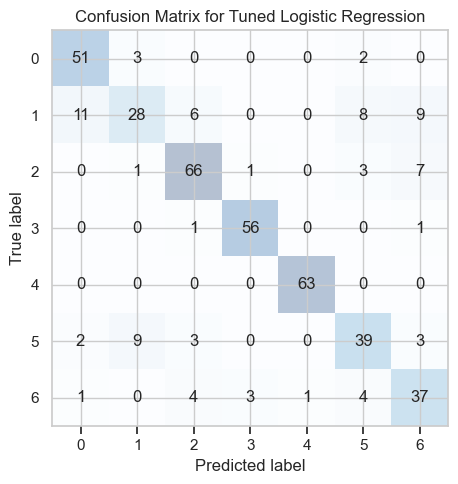

In [51]:
best_lr.fit(X_train, y_train)
tuned_lr_preds = best_lr.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=tuned_lr_preds)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

classes = np.unique(y_test)
ax.set_xticklabels([''] + list(classes))
ax.set_yticklabels([''] + list(classes))
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Tuned Logistic Regression')

plt.tight_layout()
plt.show()

In [52]:
print(classification_report(y_test, tuned_lr_preds))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        56
           1       0.68      0.45      0.54        62
           2       0.82      0.85      0.84        78
           3       0.93      0.97      0.95        58
           4       0.98      1.00      0.99        63
           5       0.70      0.70      0.70        56
           6       0.65      0.74      0.69        50

    accuracy                           0.80       423
   macro avg       0.79      0.80      0.79       423
weighted avg       0.80      0.80      0.80       423



In [53]:
tun_lr_accuracy = accuracy_score(y_true=y_test, y_pred=tuned_lr_preds)
print(f'Accuracy: {tun_lr_accuracy:.3f}')

tun_lr_precision = precision_score(y_true=y_test, y_pred=tuned_lr_preds, average='weighted')
print(f'Precision: {tun_lr_precision:.3f}')

tun_lr_recall = recall_score(y_true=y_test, y_pred=tuned_lr_preds, average='weighted')
print(f'Recall: {tun_lr_recall:.3f}')

tun_lr_f1score = f1_score(y_true=y_test, y_pred=tuned_lr_preds, average='weighted')
print(f'F1 Score: {tun_lr_f1score:.3f}')


Accuracy: 0.804
Precision: 0.800
Recall: 0.804
F1 Score: 0.797


Random Forest and XGBoost do not require scaled data, as they are based on decision trees that are insensitive to the magnitude of features.

## Random Forest -Tunning

In [54]:
pipeline_rf = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(pipeline_rf , param_grid_rf, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)

best_randomforest_classifier = grid_search.best_estimator_

Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


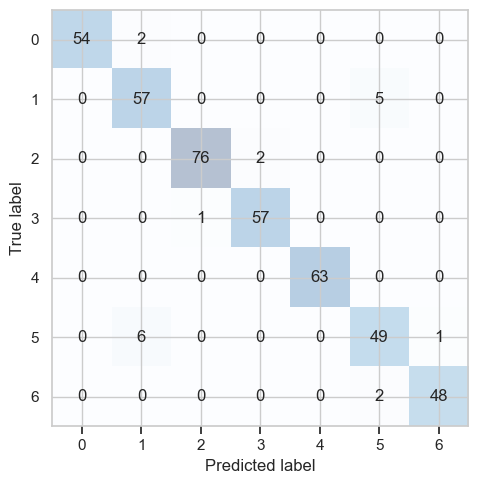

In [55]:
best_randomforest_classifier.fit(X_train, y_train)
tuned_rf_pred = best_randomforest_classifier.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=tuned_rf_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [56]:
print(classification_report(y_test,tuned_rf_pred ))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.88      0.92      0.90        62
           2       0.99      0.97      0.98        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.88      0.88      0.88        56
           6       0.98      0.96      0.97        50

    accuracy                           0.96       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.96      0.96      0.96       423



In [57]:
tunned_rf_accuracy = accuracy_score(y_true=y_test, y_pred=tuned_rf_pred)
print(f'Accuracy: {tunned_rf_accuracy:.3f}')

tunned_rf_precision = precision_score(y_true=y_test, y_pred=tuned_rf_pred, average='weighted')
print(f'Precision: {tunned_rf_precision:.3f}')

tunned_rf_recall = recall_score(y_true=y_test, y_pred=tuned_rf_pred, average='weighted')
print(f'Recall: {tunned_rf_recall :.3f}')

tunned_rf_f1_score = f1_score(y_true=y_test, y_pred=tuned_rf_pred, average='weighted')
print(f'F1: {tunned_rf_f1_score:.3f}')


Accuracy: 0.955
Precision: 0.956
Recall: 0.955
F1: 0.955


## XGBoost Tunning

In [58]:
from xgboost import XGBClassifier

pipeline_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)
best_xgboost_classifier = grid_search.best_estimator_


Best parameters found: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}


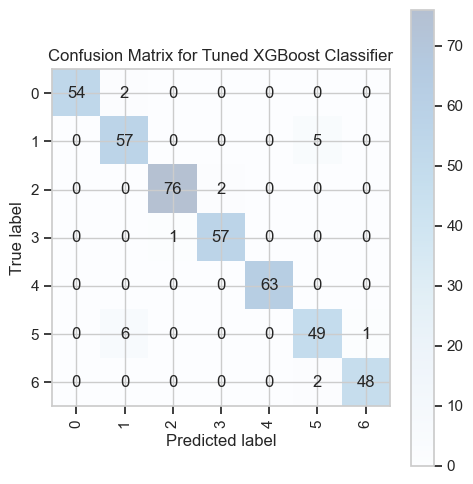

In [59]:
from matplotlib import cm
best_xgboost_classifier.fit(X_train, y_train)
tuned_xgb_pred = best_xgboost_classifier.predict(X_test)

fig, ax = plt.subplots(figsize=(5, 5))
cax = ax.matshow(confmat, cmap=cm.Blues, alpha=0.3)
fig.colorbar(cax)

for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

classes = np.unique(y_test)
ax.set_xticklabels([''] + list(classes), rotation=90)
ax.set_yticklabels([''] + list(classes))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Tuned XGBoost Classifier')
plt.tight_layout()
plt.show()

In [60]:
tuned_xgb_accuracy = accuracy_score(y_true=y_test, y_pred=tuned_xgb_pred)
print(f'Accuracy: {tuned_xgb_accuracy:.3f}')

tuned_xgb_precision = precision_score(y_true=y_test, y_pred=tuned_xgb_pred, average='weighted')
print(f'Precision: {tuned_xgb_precision:.3f}')

tuned_xgb_recall = recall_score(y_true=y_test, y_pred=tuned_xgb_pred, average='weighted')
print(f'Recall: {tuned_xgb_recall:.3f}')

tuned_xgb_f1_score = f1_score(y_true=y_test, y_pred=tuned_xgb_pred, average='weighted')
print(f'F1 Score: {tuned_xgb_f1_score:.3f}')


Accuracy: 0.957
Precision: 0.958
Recall: 0.957
F1 Score: 0.957


In [61]:
tuned_results = pd.DataFrame({
    'K-Nearest Neighbors': {'Accuracy': tun_knn_accuracy, 'Precision': tun_knn_precision, 'Recall': tun_knn_recall, 'F1 Score': tun_knn_f1score},
    'Gaussian Naive Bayes': {'Accuracy': tun_nb_accuracy, 'Precision': tun_nb_precision, 'Recall': tun_nb_recall, 'F1 Score': tun_nb_f1score},
    'Logistic Regression': {'Accuracy': tun_lr_accuracy, 'Precision': tun_lr_precision, 'Recall': tun_lr_recall, 'F1 Score': tun_lr_f1score},
    'Random Forest': {'Accuracy': tunned_rf_accuracy, 'Precision': tunned_rf_precision, 'Recall': tunned_rf_recall, 'F1 Score': tunned_rf_f1_score},
    'Gradient Boosting': {'Accuracy': tuned_xgb_accuracy, 'Precision': tuned_xgb_precision, 'Recall': tuned_xgb_recall, 'F1 Score': tuned_xgb_f1_score}
})

In [62]:
results_df = pd.DataFrame(results, index=metrics).transpose()
tuned_results_df = pd.DataFrame(tuned_results, index=metrics).transpose()
results_df.columns = pd.MultiIndex.from_product([['Untuned'], results_df.columns])
tuned_results_df.columns = pd.MultiIndex.from_product([['Tuned'], tuned_results_df.columns])
combined_results = pd.concat([results_df, tuned_results_df], axis=1)

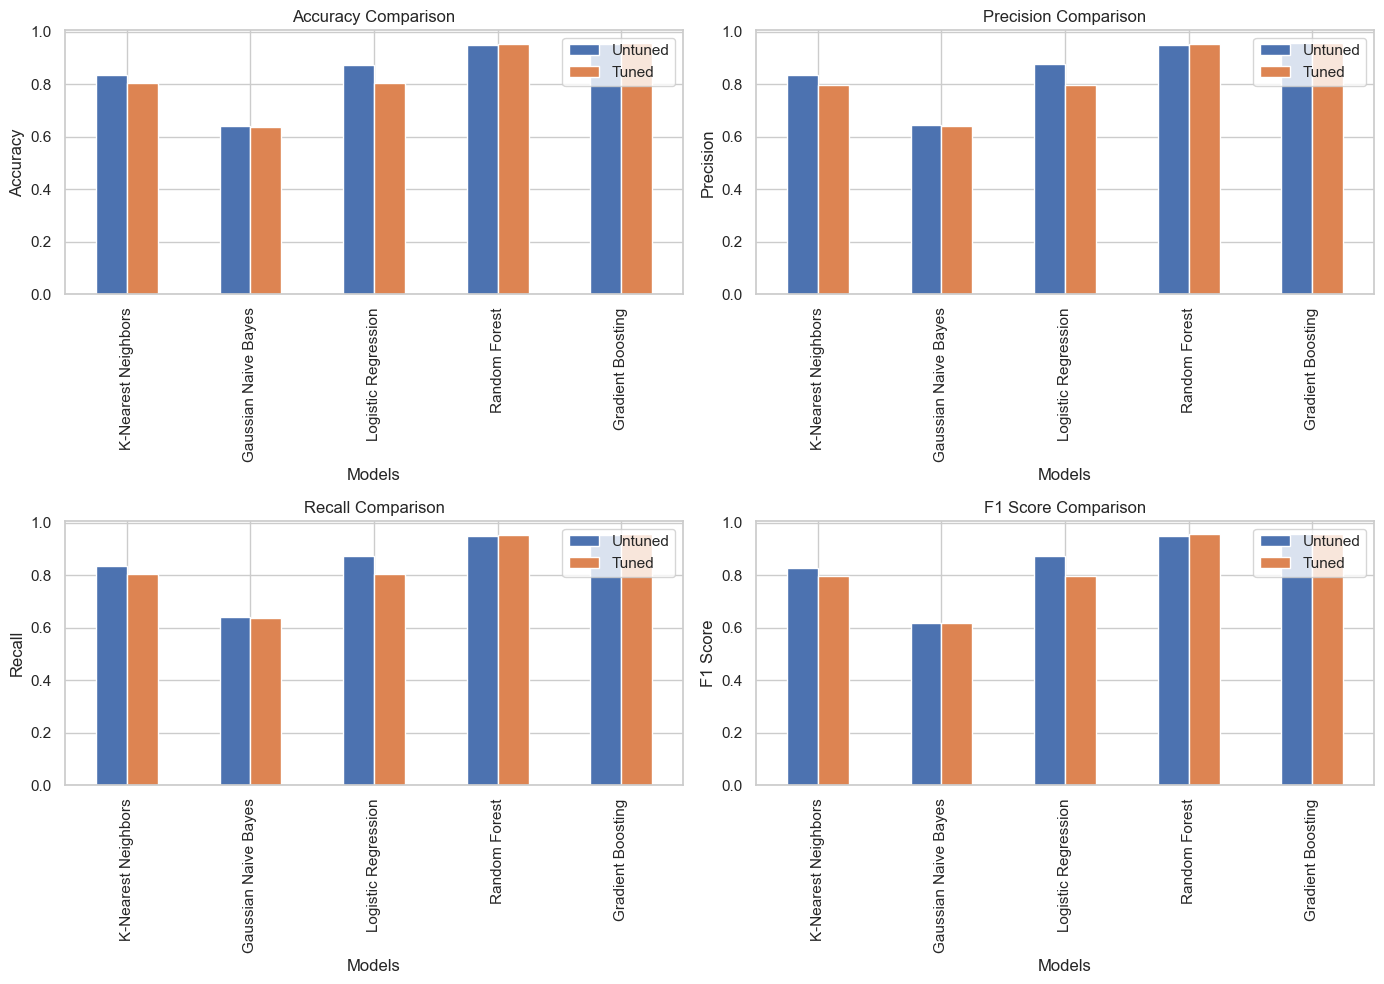

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    # Extract metric for each model and condition (Tuned vs Untuned)
    combined_results.xs(metric, level=1, axis=1).plot(kind='bar', ax=ax)
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.set_xlabel('Models')
    ax.legend(["Untuned", "Tuned"])

plt.tight_layout()
plt.show()

In [64]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
best_models = {}

for metric in metrics:
    # We loop over each metric and find the best model from both 'Tuned' and 'Untuned'
    best_score = 0
    best_model = None
    best_condition = None
    
    for condition in ['Tuned', 'Untuned']:
        if (condition, metric) in combined_results.columns:
            max_score = combined_results[(condition, metric)].max()
            if max_score > best_score:
                best_score = max_score
                best_model = combined_results[(condition, metric)].idxmax()
                best_condition = condition

    # Store results
    best_models[metric] = best_model
    detailed_scores = {m: combined_results[(best_condition, m)].loc[best_model] for m in metrics}
    
    # Print the best model for each metric
    print(f"Best model based on {metric}: {best_model} ({best_condition})")
    print(f"   {metric}: {best_score:.2f}")
    print(f"   Detailed performance metrics (Printing every metric):")
    for m in metrics:
        print(f"   {m}: {detailed_scores[m]:.2f}")
    print("\n")

Best model based on Accuracy: Gradient Boosting (Tuned)
   Accuracy: 0.96
   Detailed performance metrics (Printing every metric):
   Accuracy: 0.96
   Precision: 0.96
   Recall: 0.96
   F1 Score: 0.96


Best model based on Precision: Gradient Boosting (Tuned)
   Precision: 0.96
   Detailed performance metrics (Printing every metric):
   Accuracy: 0.96
   Precision: 0.96
   Recall: 0.96
   F1 Score: 0.96


Best model based on Recall: Gradient Boosting (Tuned)
   Recall: 0.96
   Detailed performance metrics (Printing every metric):
   Accuracy: 0.96
   Precision: 0.96
   Recall: 0.96
   F1 Score: 0.96


Best model based on F1 Score: Gradient Boosting (Tuned)
   F1 Score: 0.96
   Detailed performance metrics (Printing every metric):
   Accuracy: 0.96
   Precision: 0.96
   Recall: 0.96
   F1 Score: 0.96




As we can see the best model is XGBoost with tuned parameters.